<h1 style='color: orange; font-weight: bold; text-align: center;'>Mental Healthier Classifier</h1>

<p style='text-align: center;'> This notebook aims to classify sentences on mental health - whether is healthy or not. It is based on the Mental Health Corpus dataset provided by Reihaneh Namdari on Kaggle. </p>

### Setting up

In [10]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('ggplot')

FILE = './data/mental_health.csv.zip'

zf = ZipFile(FILE)

zf.extractall('./data/')

uri = './data/mental_health.csv'

df = pd.read_csv(uri)

### Quick EDA

In [11]:
print('Dataframe shape:', df.shape, '\n')

print(df.info(), '\n')

df.head(3)

Dataframe shape: (27977, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB
None 



,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27977.0,0.494621,0.49998,0.0,0.0,0.0,1.0,1.0


In [13]:
print('Count:\n{}\n'.format(df.label.value_counts()))
print('Percentage:\n{}'.format(df.label.value_counts(normalize=True)))

Count:
0    14139
1    13838
Name: label, dtype: int64

Percentage:
0    0.505379
1    0.494621
Name: label, dtype: float64


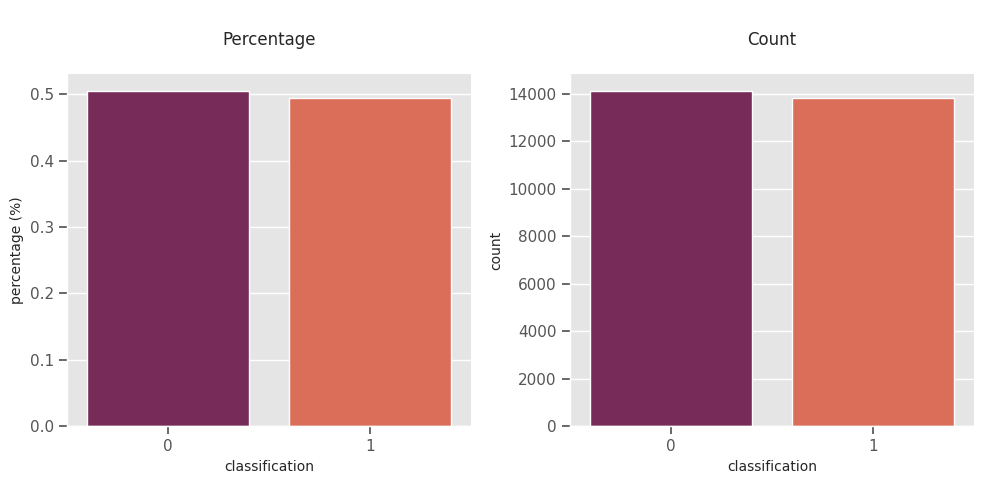

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.set_theme(style='ticks', rc={"axes.spines.right": False, "axes.spines.top": False})

sns.barplot(
  data=df.label.value_counts(normalize=True).reset_index(), 
  x='index', 
  y='label',
  palette="rocket",
  ax=axs[0]
)

sns.barplot(
  data=df.label.value_counts(normalize=False).reset_index(), 
  x='index', 
  y='label',
  palette="rocket",
  ax=axs[1]
)

axs[0].set_title('\nPercentage\n')
axs[0].set_xlabel('classification')
axs[0].set_ylabel('percentage (%)')

axs[1].set_title('\nCount\n')
axs[1].set_xlabel('classification')
axs[1].set_ylabel('count')

plt.tight_layout()

plt.show()

### Tokenization

In [15]:
for num in range(0,5):
    pass
    print(f'Iteration: {num}')
    print("This statement is after 'pass'")
    continue
    print("This statement is after 'continue'")

Iteration: 0
This statement is after 'pass'
Iteration: 1
This statement is after 'pass'
Iteration: 2
This statement is after 'pass'
Iteration: 3
This statement is after 'pass'
Iteration: 4
This statement is after 'pass'


In [16]:
from nltk import word_tokenize
import nltk

def find_entry(index: int):
  if type(index) == int:
    print('Text:\n{}'.format(df.text.values[index]), '\n')
    print('Label:\n{}'.format(df.label.values[index]))
  else:
    raise ValueError
  
find_entry(24) 

Text:
im warn you please hear out hello getting straight point searching friends know basic daily stuff hitted upon someone nickname  umykittylolitahttpswwwredditcomusermykittylolita  asking discord since everything started get outta hand stalking even hiding fact they even doubt really girl digging private info even that one hella weird cutting or faking cut seem rly legit me arm nickname used go by owie sending images time trying take logic understanding approach understood much blocked em off got join discord server  mins also banned em server order keep rest members save started inviting many active people server server started straightup talking shit me dropping many screenshots private conversations possible weirdconcerning creepy repulsive yall doublecheck watchout 

Label:
0


In [17]:
tokens = nltk.word_tokenize(df.text.values[100])
tagged = nltk.pos_tag(tokens)

print(f'{tokens[:10]} \n\n {tagged[:10]}')

['driven', 'redflagi', 'think', 'partners', 'negativity', 'driving', 'redflag', 'started', 'months', 'ago'] 

 [('driven', 'RB'), ('redflagi', 'JJ'), ('think', 'VBP'), ('partners', 'NNS'), ('negativity', 'JJ'), ('driving', 'VBG'), ('redflag', 'NN'), ('started', 'VBD'), ('months', 'NNS'), ('ago', 'IN')]


### Train/Test split

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()

texts = df['text'].values
labels = df['label'].values

texts_train, texts_test, y_train, y_test = train_test_split(
  texts, 
  labels, 
  test_size=0.30, 
  random_state=1000
)

print(f'Train size: {texts_train.shape}')
print(f'Test size: {texts_test.shape}')

Train size: (19583,)
Test size: (8394,)


###  `CountVectorizer()`

In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(texts_train)

x_train, x_test = vectorizer.transform(texts_train), vectorizer.transform(texts_test)

### `LogisticRegression()`

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=1000)
classifier.fit(x_train, y_train)

classifier.score(x_test, y_test)

0.9108887300452704

### Classify

In [75]:
def classify(text: str):
  sparse_matrix = vectorizer.transform([text])
  prediction = classifier.predict(sparse_matrix)
  
  if prediction[0] == 1:
    result = 'Positive'
  else:
    result = 'Negative'
  
  return result

text = df.text.values[0]
classification = classify(df.text.values[0])

print(f'Text: {text}\n\nClassification: {classification}')

Text: dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math

Classification: Negative
